#Dataset Description

\

## The dataset contains information about road traffic accidents with the following columns:

`Time`: Time of the accident

`Day_of_week`: Day of the week when the accident occurred

`Age_band_of_driver`: Age group of the driver

`Sex_of_driver`: Gender of the driver

`Educational_level`: Educational level of the driver

`Vehicle_driver_relation`: Relationship of the driver to the vehicle

`Driving_experience`: Driving experience of the driver

`Type_of_vehicle`: Type of vehicle involved in the accident

`Owner_of_vehicle`: Owner of the vehicle

`Service_year_of_vehicle`: Service years of the vehicle

`Area_accident_occured`: Area where the accident occurred

`Lanes_or_Medians`: Lanes or medians at the accident site

`Road_allignment`: Road alignment at the accident site

`Types_of_Junction`: Type of junction at the accident site

`Road_surface_type`: Type of road surface at the accident site

`Road_surface_conditions`: Road surface conditions at the accident site

`Light_conditions`: Light conditions at the time of the accident

`Weather_conditions`: Weather conditions at the time of the accident

`Type_of_collision`: Type of collision

`Number_of_vehicles_involved`: Number of vehicles involved in the accident

`Number_of_casualties`: Number of casualties in the accident

`Vehicle_movement`: Movement of the vehicle during the accident

`Casualty_class`: Class of casualty (driver, passenger, pedestrian)

`Sex_of_casualty`: Gender of the casualty

`Age_band_of_casualty`: Age group of the casualty

`Casualty_severity`: Severity of the casualty

`Work_of_casuality`: Occupation of the casualty

`Fitness_of_casuality`: Fitness of the casualty

`Pedestrian_movement`: Movement of the pedestrian

`Cause_of_accident`: Cause of the accident

`Accident_severity`: Severity of the accident


# Tasks

##1. Data Cleaning

In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install data_patterns

   ---------------------------------------- 0.0/159.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/159.9 kB ? eta -:--:--
   ------- -------------------------------- 30.7/159.9 kB ? eta -:--:--
   --------- ----------------------------- 41.0/159.9 kB 653.6 kB/s eta 0:00:01
   -------------- ------------------------ 61.4/159.9 kB 409.6 kB/s eta 0:00:01
   ------------------- ------------------- 81.9/159.9 kB 459.5 kB/s eta 0:00:01
   -------------------------- ----------- 112.6/159.9 kB 504.4 kB/s eta 0:00:01
   ---------------------------------- --- 143.4/159.9 kB 502.3 kB/s eta 0:00:01
   -------------------------------------- 159.9/159.9 kB 504.0 kB/s eta 0:00:00


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import data_patterns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

### Read the dataset

In [11]:
df =pd.read_csv('Task (1) Dataset.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


### Handle Missing Values

In [8]:
print(df.isnull().sum())

Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64


Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

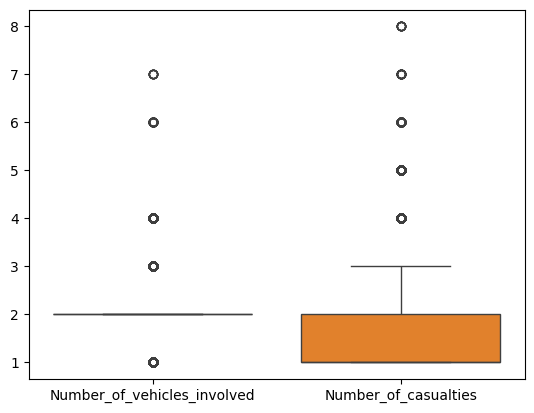

In [13]:
sns.boxplot(df)
print(df.isnull().sum())

### Correct any inconsistent data entries.

### Ensure data types are appropriate for each column.

---



## 2. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [4]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


### Identify and analyze patterns in the data.

In [22]:

# Explore the data
print(df.head())
print(df.info())
print(df.describe())

# Analyze patterns in the data
# 1. Frequency of accidents by day of the week
plt.figure(figsize=(8, 6))
df['Day_of_week'].value_counts().plot(kind='bar')
plt.title('Frequency of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

# 2. Accident frequency by driver age band
plt.figure(figsize=(8, 6))
df['Age_band_of_driver'].value_counts().plot(kind='bar')
plt.title('Frequency of Accidents by Driver Age Band')
plt.xlabel('Age Band of Driver')
plt.ylabel('Number of Accidents')
plt.show()

# 3. Relationship between weather conditions and accident severity
plt.figure(figsize=(8, 6))
sns.countplot(x='Weather_conditions', hue='Accident_severity', data=df)
plt.title('Weather Conditions and Accident Severity')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.show()

# 4. Correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()

# 5. Accident frequency by vehicle type
plt.figure(figsize=(8, 6))
df['Type_of_vehicle'].value_counts().plot(kind='bar')
plt.title('Frequency of Accidents by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.show()

# Additional analysis can be performed based on the specific business questions or insights you're looking for.

             Age_band_of_driver  Sex_of_driver  Educational_level  \
Day_of_week                                                         
Monday                        0              1                  1   
Tuesday                       1              0                  0   
Wednesday                     2              1                  1   

             Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
Day_of_week                                                                 
Monday                             1                   2                2   
Tuesday                            0                   1                1   
Wednesday                          1                   0                0   

             Owner_of_vehicle  Service_year_of_vehicle  Defect_of_vehicle  \
Day_of_week                                                                 
Monday                      1                        2                  0   
Tuesday                     0        

KeyError: 'Day_of_week'

<Figure size 800x600 with 0 Axes>

### Visualize the distribution of key variables (e.g., Age_band_of_driver, Type_of_vehicle).

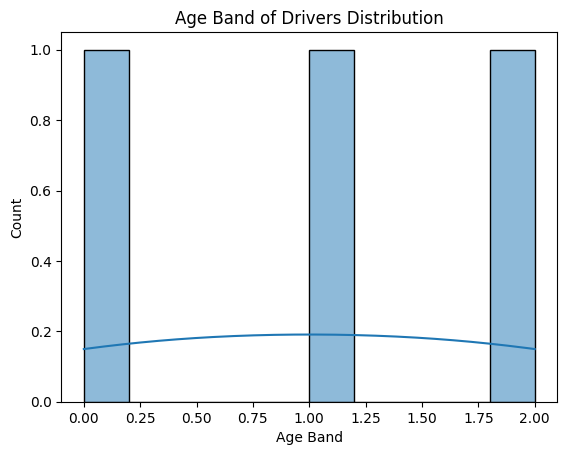

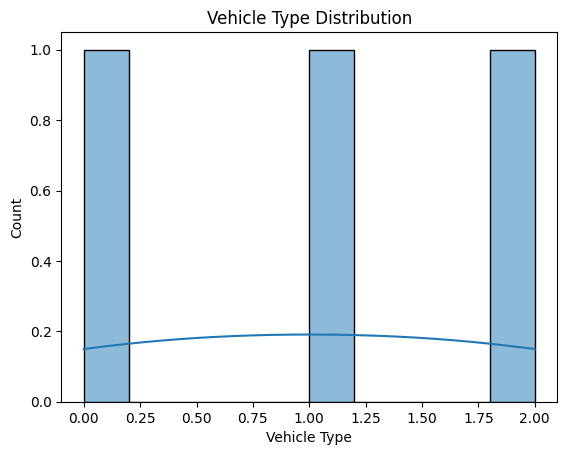

In [18]:
sns.histplot(data=df, x="Age_band_of_driver", bins=10, kde=True)
plt.title("Age Band of Drivers Distribution")
plt.xlabel("Age Band")
plt.ylabel("Count")
plt.show()

sns.histplot(data=df, x="Type_of_vehicle", bins=10, kde=True)
plt.title("Vehicle Type Distribution")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.show()


### Explore relationships between variables (e.g., Age_band_of_driver vs. Accident_severity).


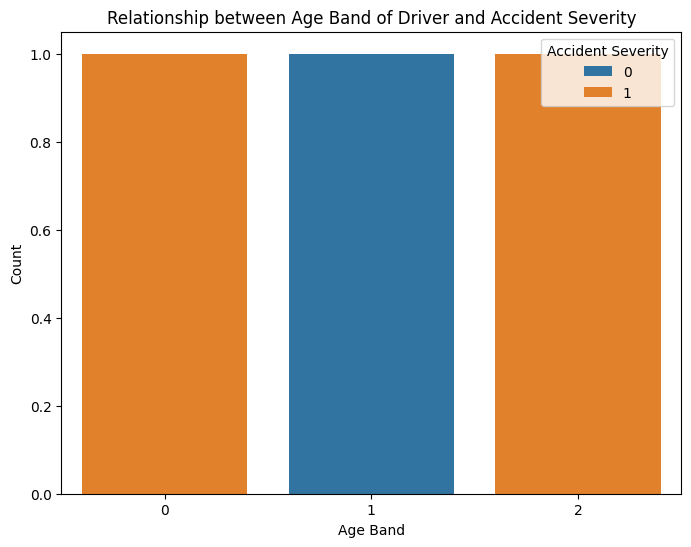

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_band_of_driver', hue='Accident_severity', data=df)
plt.title('Relationship between Age Band of Driver and Accident Severity')
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.show()

## 3. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.

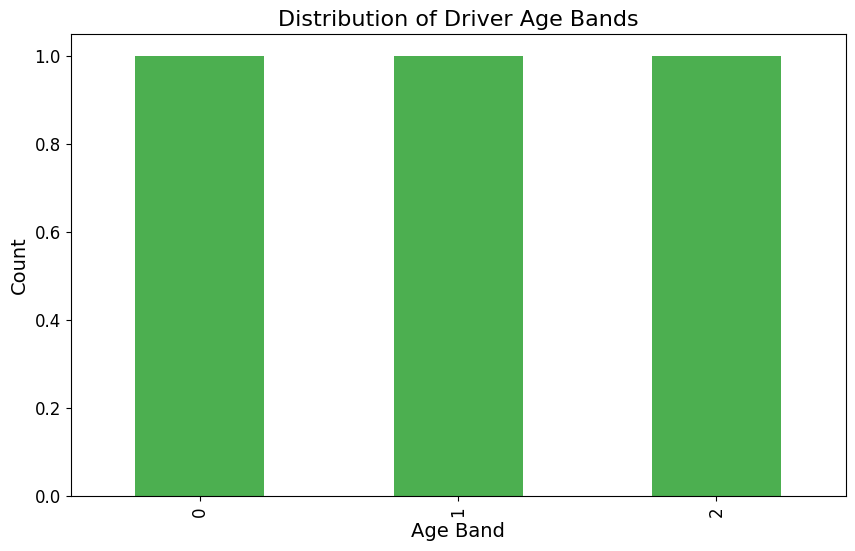

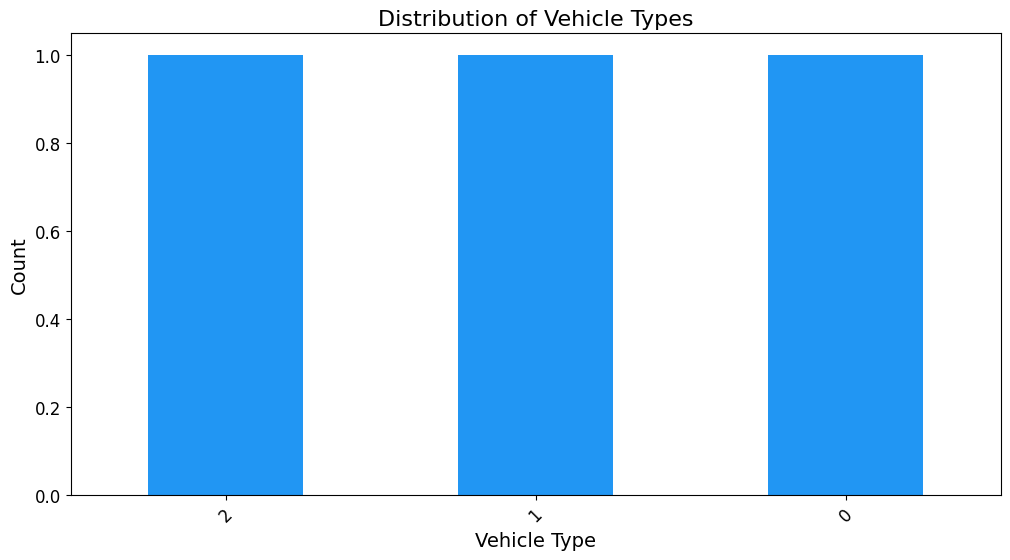

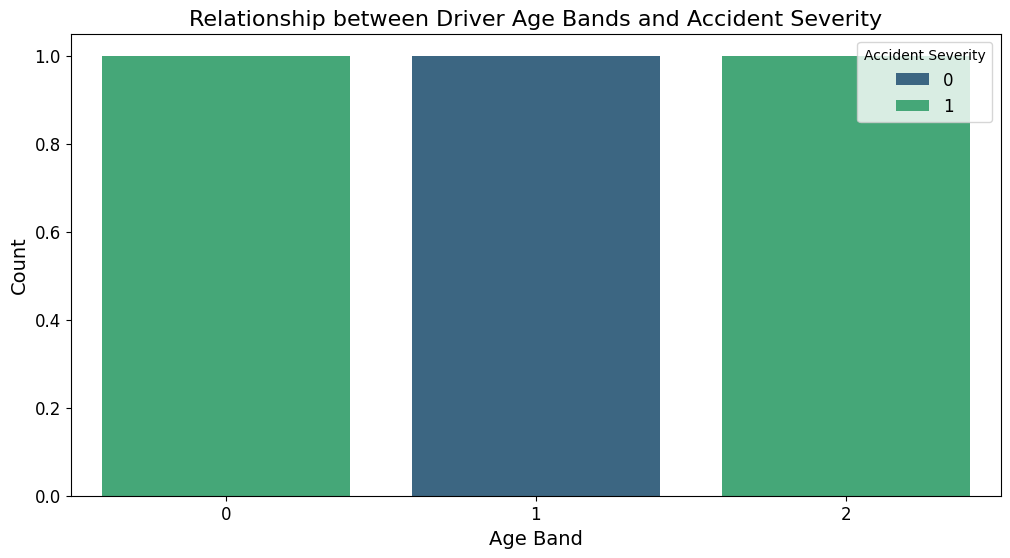

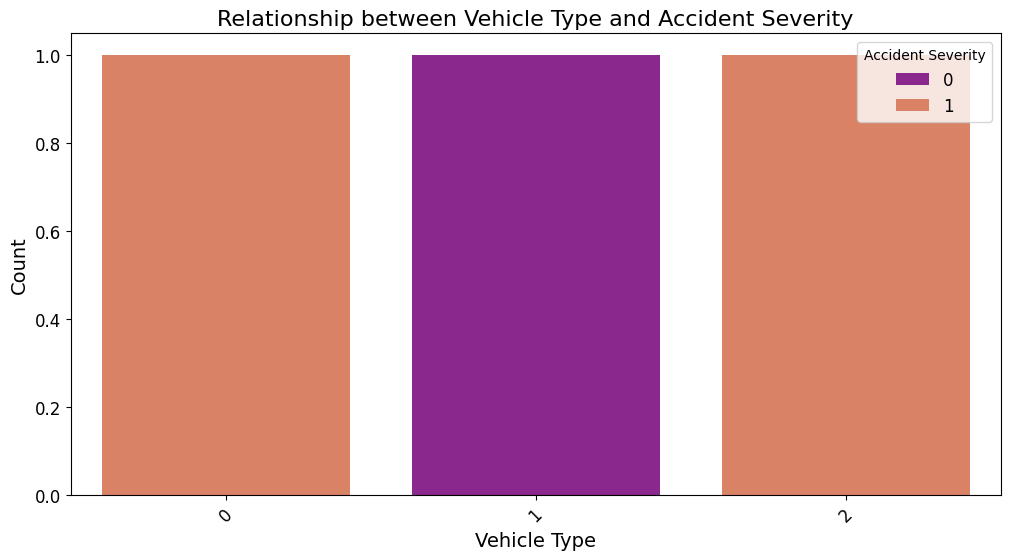

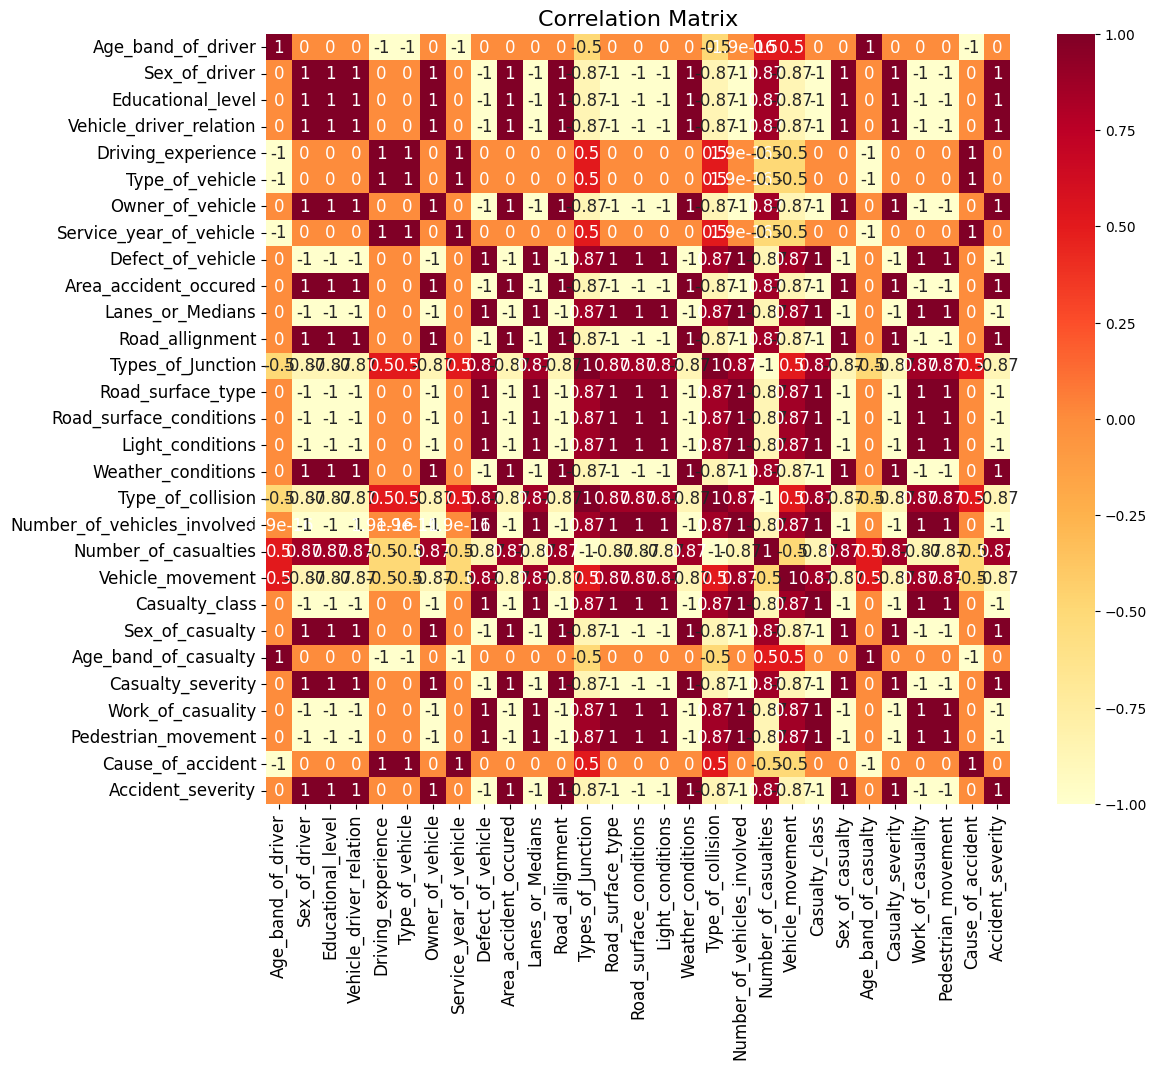

In [15]:
# Visualize the distribution of Age_band_of_driver
plt.figure(figsize=(10, 6))
df['Age_band_of_driver'].value_counts().plot(kind='bar', color='#4CAF50')
plt.title('Distribution of Driver Age Bands', fontsize=16)
plt.xlabel('Age Band', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Visualize the distribution of Type_of_vehicle
plt.figure(figsize=(12, 6))
df['Type_of_vehicle'].value_counts().plot(kind='bar', color='#2196F3')
plt.title('Distribution of Vehicle Types', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Visualize the relationship between Age_band_of_driver and Accident_severity
plt.figure(figsize=(12, 6))
sns.countplot(x='Age_band_of_driver', hue='Accident_severity', data=df, palette='viridis')
plt.title('Relationship between Driver Age Bands and Accident Severity', fontsize=16)
plt.xlabel('Age Band', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Accident Severity', fontsize=12)
plt.show()

# Visualize the relationship between Type_of_vehicle and Accident_severity
plt.figure(figsize=(12, 6))
sns.countplot(x='Type_of_vehicle', hue='Accident_severity', data=df, palette='plasma')
plt.title('Relationship between Vehicle Type and Accident Severity', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Accident Severity', fontsize=12)
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', annot_kws={'size': 12})
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

## 4. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>